# Exploratory Data Analysis of Boston Housing Price Data Set (Tutorial)

## Learning Goals:
- Use Pandas DataFrame
- Use Seaborn to plot
    - pair plots
    - scatterplots
    - heat map of correlation coefficients
    - line of best fit and confidence interval
- Understand the assumptions and features which are problematic in this 1978 data set and how this relates to data ethics.    

## Data Set

The data set can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/.  In general, University of California Irvine has a Machine Learning Repository with many data sets available for download.  Their home site is https://archive.ics.uci.edu/ml/index.php.  Kaggle also has this data set along with a description of what it contains: https://www.kaggle.com/c/boston-housing.  We can directly load the data set from sklearn.  Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you are already be familiar with, like NumPy, Pandas, and Matplotlib.

## Exploratory Data Analysis (EDA) helps us maximize the insight from a data set and uncovers underlying structures of the data.

### Data Preparation

In [ ]:
# import packages we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn # to get the Boston data set
%matplotlib inline # this line lets  us have plots right in this Jupyter notebook

In [3]:
# read the data set directly from sklearn

from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

This data set has an ethical problem (actually, several), and has been phased out of many libraries.  It is an example of how systemic racism can occur in data, and alerts us to the need to be aware of societal biases that can manifest in data sets and resulting analysis.  The goal of using this data set for these exercises is to:
1. Educate users about the history of the data set and how the variables were constructed.
2. Show users how socioeconomic inequities that are reflected in data can potentially lead to fairness-related harms in downstream modeling.
3. Suggest alternative benchmarking data sets via a follow up assignment.

In [5]:
type(boston)

sklearn.utils.Bunch

In [11]:
data = boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### Pandas Data Frame

In [12]:
data = pd.DataFrame(data = data, columns = boston.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
# add the target (price of house in thousands of USD) as a new column called Price
data['Price'] = boston.target
data.head() # see just a few lines

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Features
The different features in this data set are defined to be the following and are from the original paper by Harrison and Rubinfield cited in the References.
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million) as a proxy for air pollution
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per ten thousand dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - Lower status of the population
- Price - Median value of owner-occupied homes in thousands of dollars.

At least two features in this data set are problematic.

The feature B accounts for racism as a factor in pricing.  Moreover, the authors transform census data using a quadratic relationship $1000(B-.63)^2$, which is not justified or supported by evidence.  This is also problematic as it is a non-invertible transformation on the data and the original data is not included in the publication.  Data transformations which are invertible include shifting, scaling, normalization (scaling with the sum of all values in a column), standardization (shifting by the mean, then scaling by the standard deviation), etc., and are widely used in the field of data science.

In [14]:
# statistical description of the data
data.describe()
# count tells us there are 506 entries
# notice that the mean between each columns varies a great deal

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
data_desc = data.describe()
# look at mean of each attribute-- this is just the second row above
data_desc.loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64

In [17]:
data.info()
# this suggests we could convert to float32 to save memory usage, 
# although this is a small enough data set we are not concerned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
# this gives the total number of null values in each column
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [20]:
# check for duplicate entries
data.duplicated()
# if there are none, the sum of all will be zero
data.duplicated().sum()

0

<AxesSubplot:>

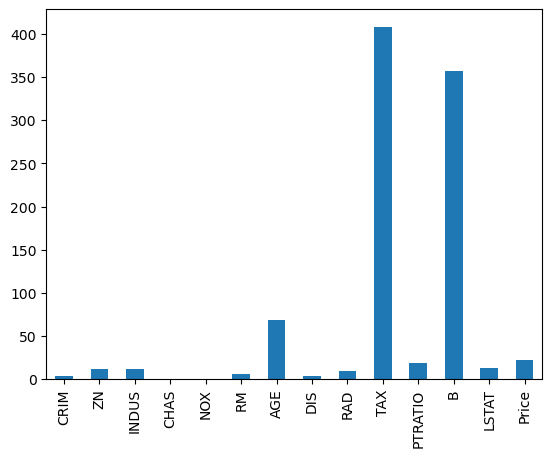

In [22]:
# plot the mean value for each feature as a bar plot
data_desc.loc['mean'].plot.bar()
# this shows us the means are not all on the same scale, and some variables might influence
# the final prediction more than others.  
# This suggested standardization/normalization should be done before any ML.

In [23]:
# the plot above is adequate, but there are ways to style it and make it more 
# visually appealing
# this will show style choices available that we can use for customization.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [27]:
pwd
# if this is not the working directory you want to be in
# import os 
# os.chdir ('THIS SHOULD BE YOUR DESIRED DIRECTORY')


'/Users/kamilalarripa/Desktop/DATA 271'

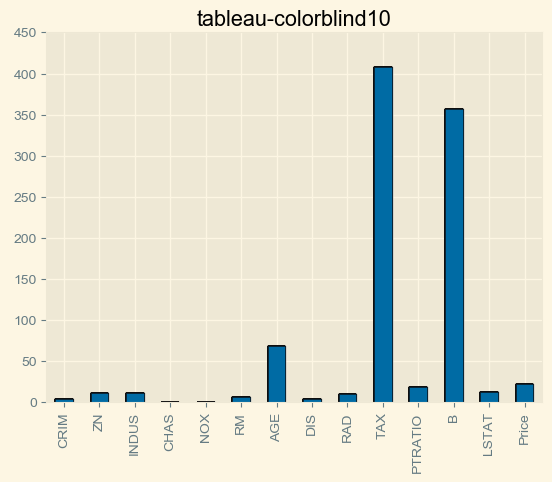

In [28]:
# loop through styles to choose what we prefer
# samples will be stored in a folder called "plots" in your working directory
for style in plt.style.available:
    plt.style.use(style)
    data_desc.loc['mean'].plot.bar()
    plt.title(style) # so we know which one is which
    # we need to make a folder called plots in the directory we are working to save the figures
    plt.savefig('plots/' + style + ".png")
    
 # go to the folder to see which plot you like best   

<AxesSubplot:>

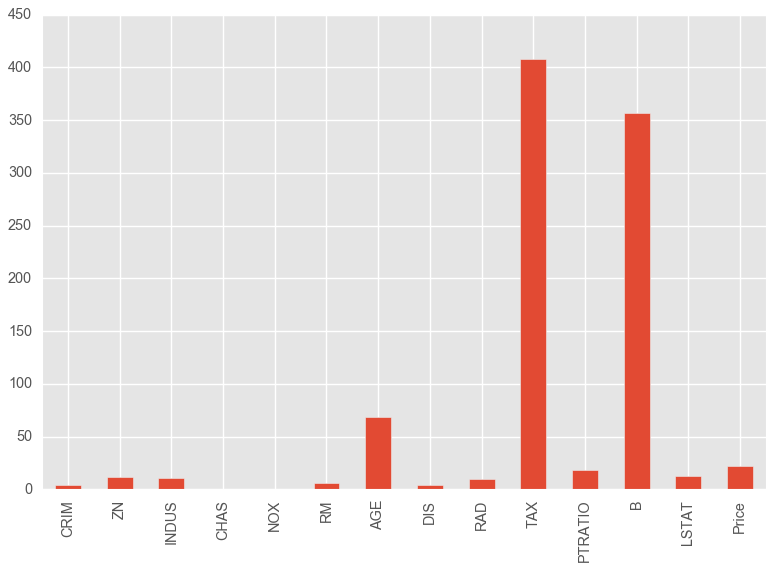

In [29]:
# let's say we like the ggplot version the best
plt.style.use('ggplot')
data_desc.loc['mean'].plot.bar()

### Pair Plots

In [30]:
# We might be curious how columns (other than price) are correlated with each other.  It is difficult to see in
# tabular form, but plots might be helpful.
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Pair plots (also called a scatterplot matrix) are one of the most effective starting tools in EDA.  The pair plots builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

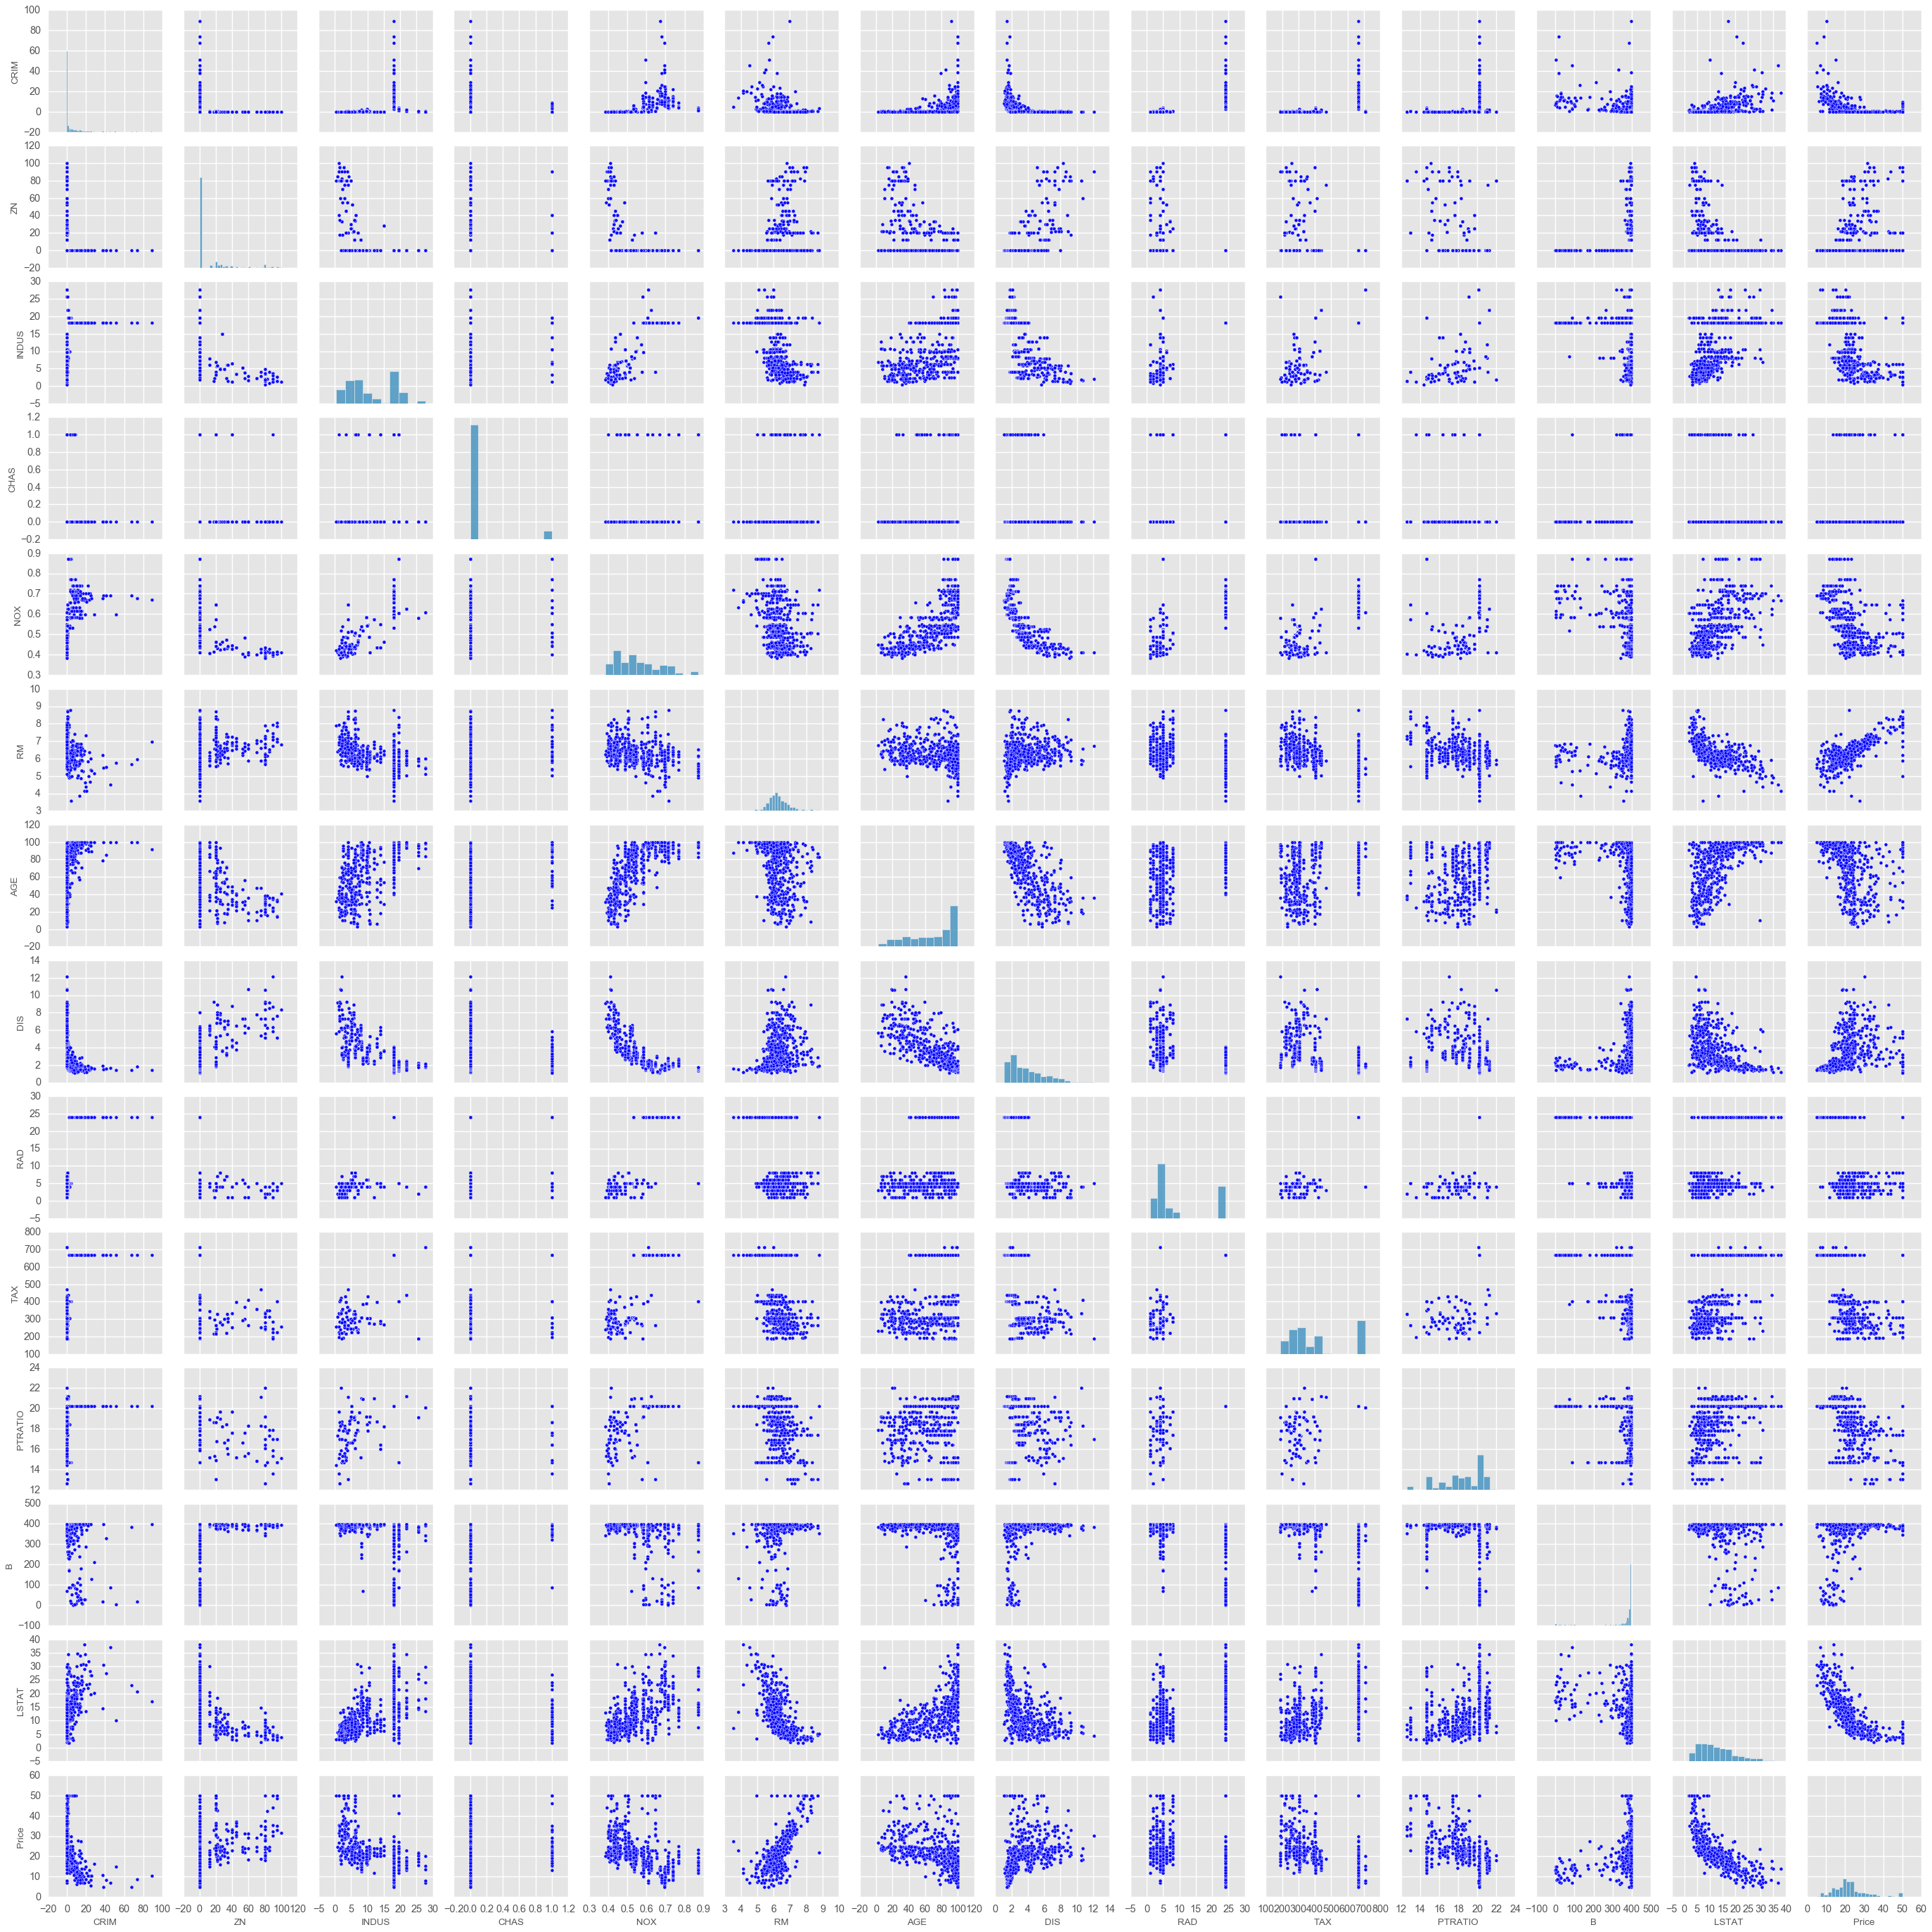

In [33]:
 # seaborn is good for scatter plot
import seaborn as sns
sns.pairplot(data)  
# this will create 14 x 14 = 196 subplots

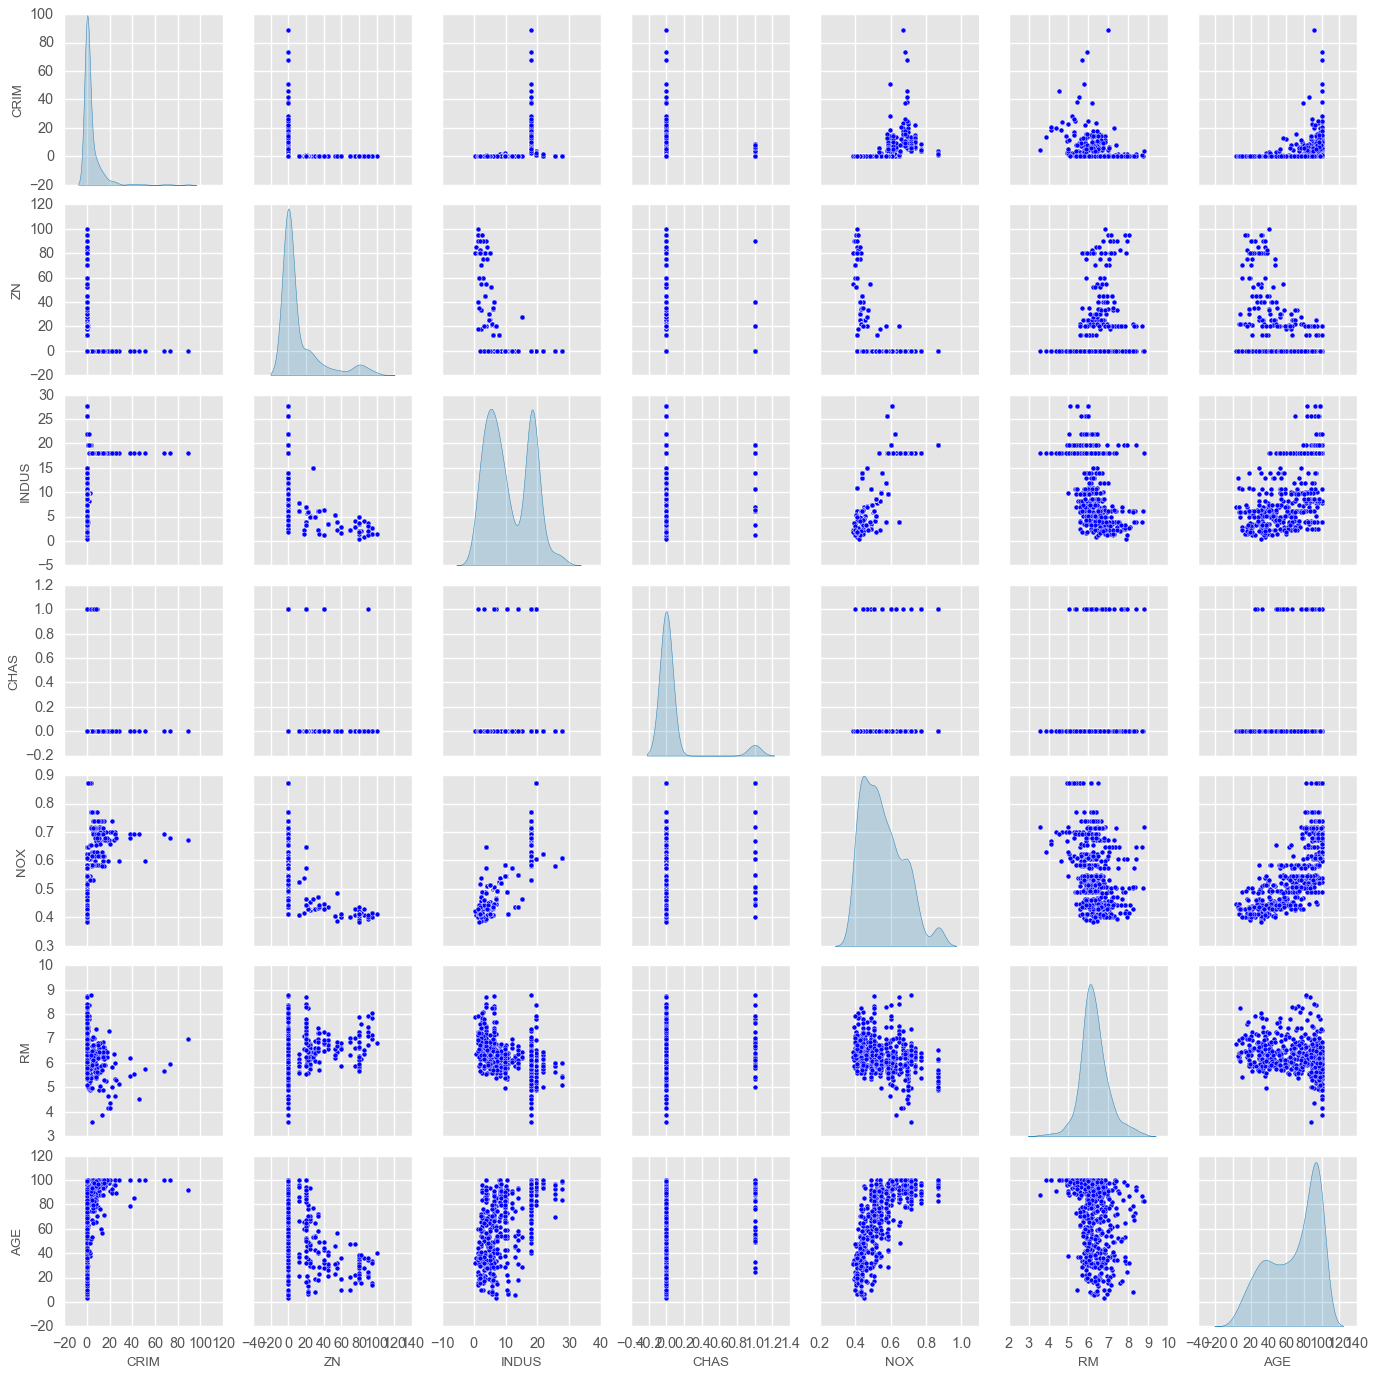

In [35]:
# it is a bit overwhelming to see 14 x 14 plots, so we can limit it to 7 x 7--upper corner of the previous figure
# this will make each plot a bit larger
# we also replaced histograms with smooth distributions
sns.pairplot(data.iloc[:,np.hstack(([0], range(1,7)))], diag_kind = 'kde') # take the first 7 columns
# note: np.hstack stack arrays in sequence horizontally (column wise).

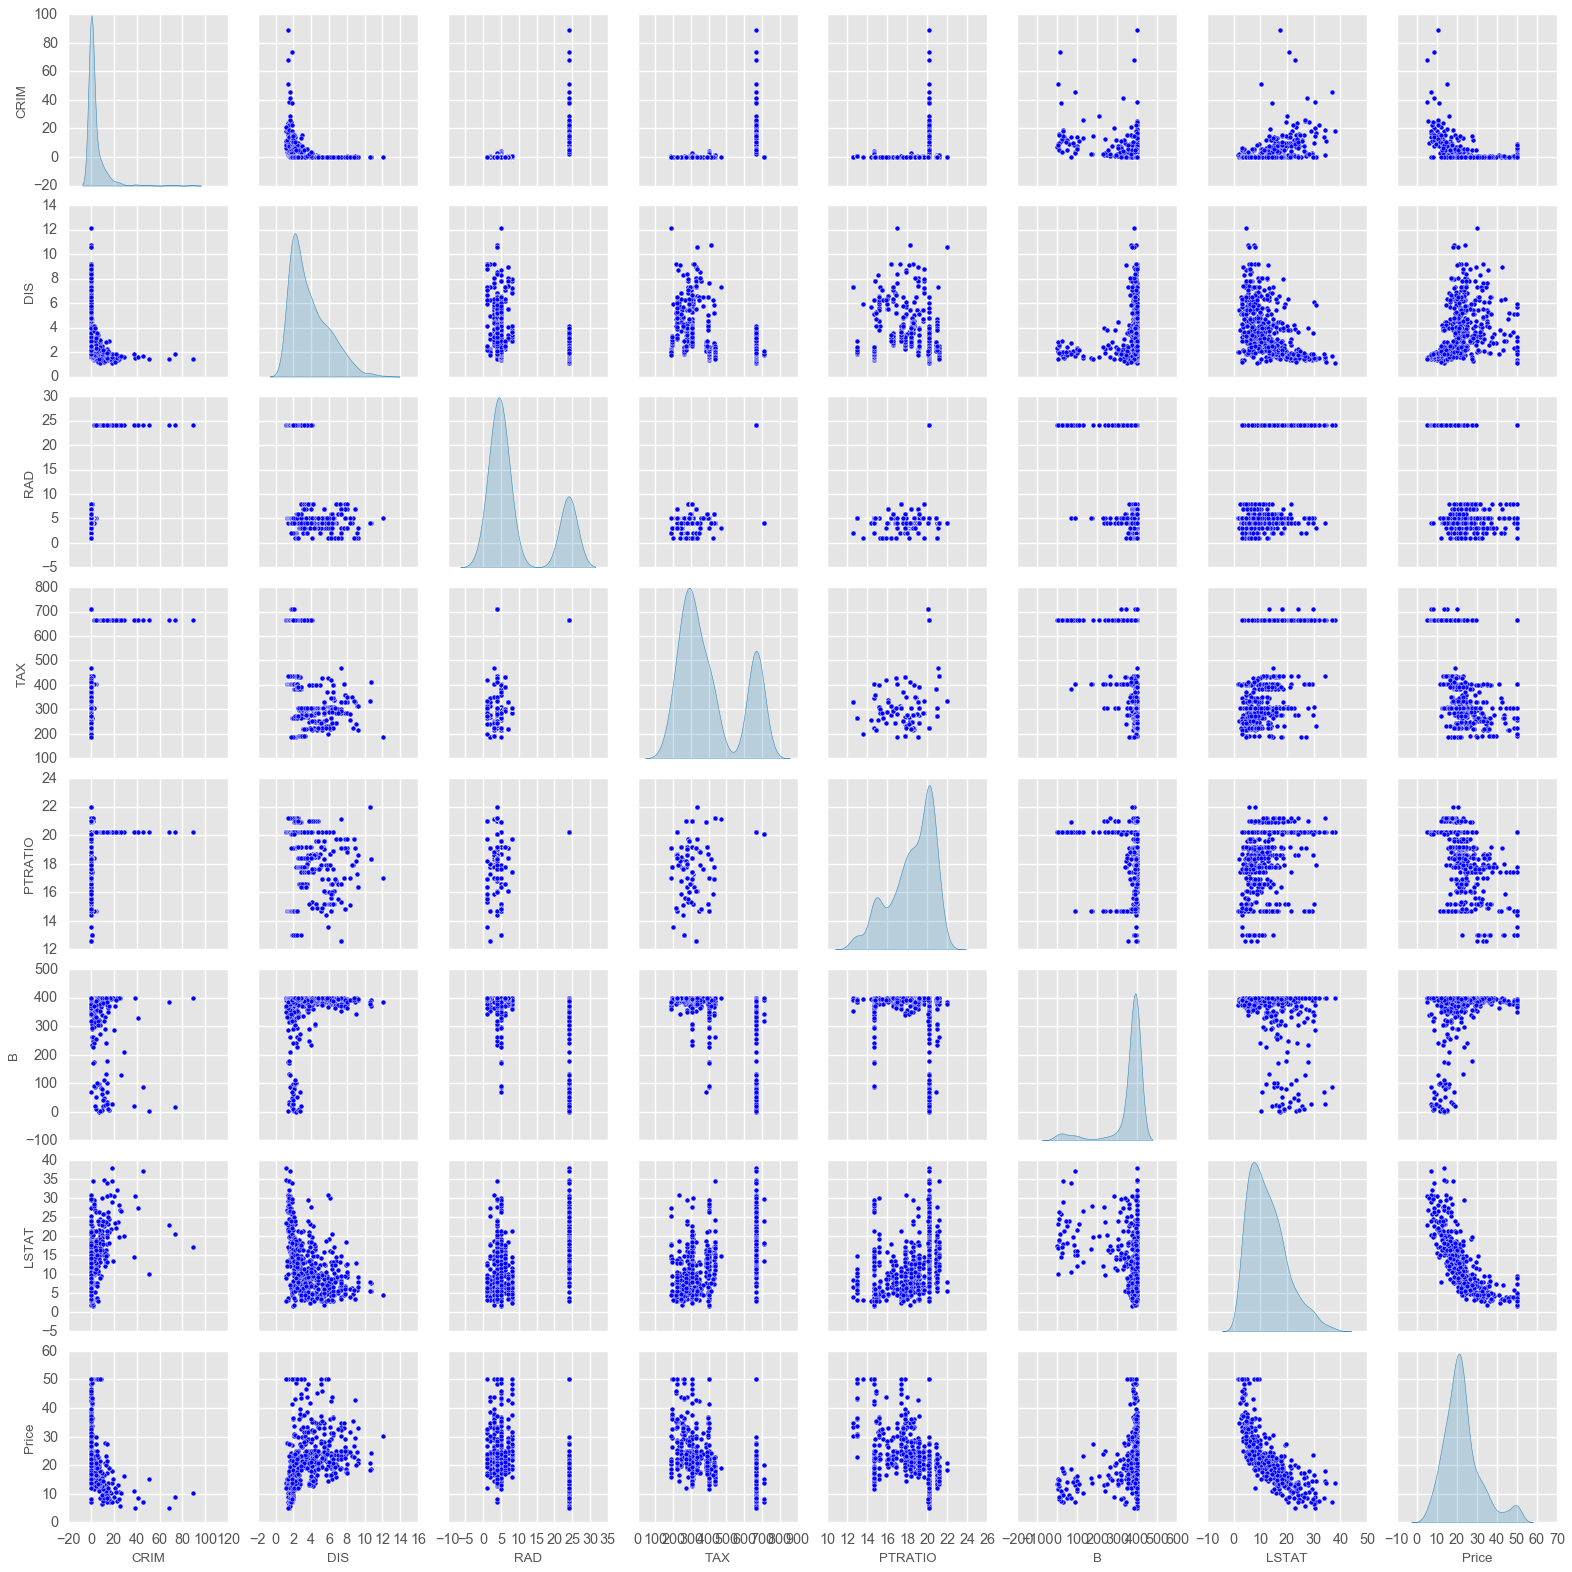

In [36]:
# we can now look at another subset of plots-- note the change in range()
sns.pairplot(data.iloc[:,np.hstack(([0], range(7,14)))], diag_kind = 'kde') # take the second 7 columns

Look at the distribution (light blue shaded curve) for Price in the figure above.  It is almost normally distributed (like a bell curve).  Look at the distribution for TAX in the figure above.  It is bimodal (two peaks) indicating households grouped into some that paid low taxes and some high taxes.  This is similar for the distribution for Rad (highway access to home).  The crime variable is left skewed, meaning most houses have low crime in their neighborhoods.

### Scatterplots

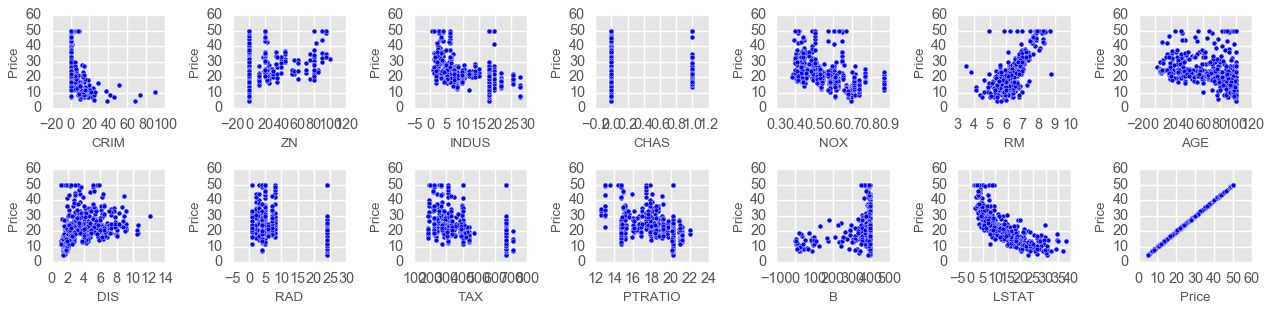

In [54]:
rows = 2
cols = 7

fig, ax = plt.subplots(rows, cols, figsize = (16,4) ) 

col = data.columns
index = 0

# plot price as dependent variable (y-axis) against all other variables

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = col[index], y = 'Price', data = data, ax = ax[i][j]) # col[index] will give the columns names
        index = index + 1
        
plt.tight_layout()
plt.show()


A few observations: the last graph, plotting price against price, is exactly a straight line.  This is not surprising, since price is perfecly correlated with itself (anytime you plot a variable against itself you would expect this).  Consider RM vs Price, which shows a positive correlation.  This graph shows that as the number of rooms increases (move right along the x-axis), the price generally increases (points move up the y-axis).  Of course this is not perfect-- there are multiple points that are outside of this linear trend.  Now consider Age vs Price.  We are not seeing a clear linear trend, but something of note is that when the age of a house is high (move right on the x- axis), its price can be low or high (points are at various heights).  This variation could be related to the maintenance and upgrades performed or other local influences (e.g., schools in the neighborhood, the construction of a highway near the home).

Now consider the graph depicting LSTAT v Price.  LSTAT is also a problematic variable in this data set, and represents the percentage of "lower status of the population" as defined by Harrison and Rubenfield in their publication, where this dataset first appeared.  The authors looked at the proportion of male workers classified as laborers and the proportion of adults without some high school education and then applied a logarithmic transformation to imply that the socioeconomic status distinctions have a larger impact in the upper brackets of society.  These assumptions have been unsubstantiated, and a log-transformation might not be appropriate (see Feng, 2014).

Although we will not rely on this variable given the issues stated above, the graph of LSTAT vs Price is an example of negative correlation: home prices descrease as LSTAT increases.  The trend is not exactly linear, though, and at higher levels of LSTAT, the price appears to flatten.

Lastly, some variables show very little correlation with house price.  For example, consider CHAS vs Price, where CHAS relates to the propery being along the Charles River (1 if the property bounds the river, 0 if it does not, which is why only 2 values for CHAS are represented).  We should not, in fact, use a scatterplot for this because CHAS is really a categorical variable.

Scatterplots are extremely useful for a quick visual analysis, but we will also demonstrate ways to precisely measure correlation in the next sections.

### Correlation Coefficients and Heatmaps

In [55]:
corrmat = data.corr() # make correlation matrix
corrmat # 14 x 14 matrix, each entry gives Pearson correlation coefficient.  Notice ones on the diagonal.  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [56]:
# size
corrmat.shape

(14, 14)

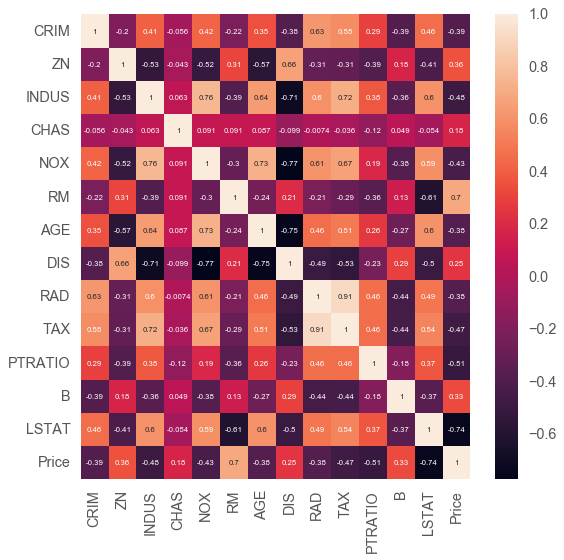

In [62]:
# plot as a heat map to visualize the information in the matrix
fig, ax = plt.subplots(figsize = (7, 7)) 
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7}) # annot = True plots the correlation value in each cell
# annot_kws lets us control the size of the text
plt.show()



This heat map lets us notice variables which have a strong negative correlation (black) and variables which have a strong positive correlation (lighter colors).  Obviously, the diagonal shows perfect linear correlation because these entires are measuring the correlation of a variable against itself.  We also notice symmetry-- for example, the entry in the second row, third column is the same as the entry in the third row, second column.  ZN vs INDUS (proportion of land zoned for lots over 25,000 square feet versus proportion of non-retail business acres per town) has the same correlaton as INDUS vs ZN.  Look at the scatterplots we identified and discussed above and relate them to the correlation you see in the heat map.

### Correlated Feature Selection

One reason it is useful to identify features with high correlation is that it can allow us to reduce the number of features (inputs) used to make a prediction when applying machine learning algorithms.  Its purpose is to remove non-informative or redundant predictors from the model.

In [63]:
corrmat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [65]:
# creates list of indices and related correlations values, create a pandas data frame and then returns it

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = [] # store correlation value for particular features
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
        
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
        
    return df
    

In [67]:
# set threshold
threshold = .5
# create data frame which has correlation values with price > .5 or < -.5
corr_df = getCorrelatedFeature(corrmat['Price'], threshold) # we are passing the price column only
corr_df

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


Note, if we inspect the heatmap and look at the last column, PTRATIO, LSTAT and Price are the rows which have a correlation value greater than .5 or less than -.5.  This exactly corresponds with what is placed in corr_df.  Notice the difference between the negative and positive correlations-- a negative correlation means as one variable increases, the other decrease, whereas a positive correlation means if one variable increases, the other also increases.  For example, with PTRATIO, if the ratio is high (lots of students per teacher), the house prices are lower.

### Heatmap and Pair Plot of Correlated Data

In [70]:
correlated_data = data[corr_df.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


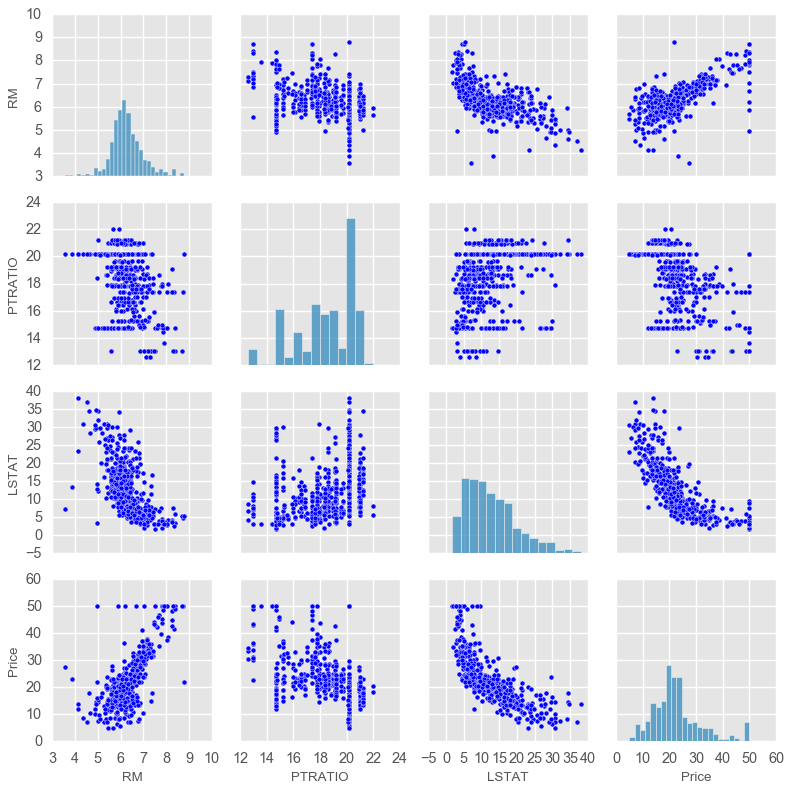

In [71]:
# plot pair plots to display columns which are highly correlated 
# (either positively or negatively) with the price
sns.pairplot(correlated_data)
plt.tight_layout()

## Boxplot

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

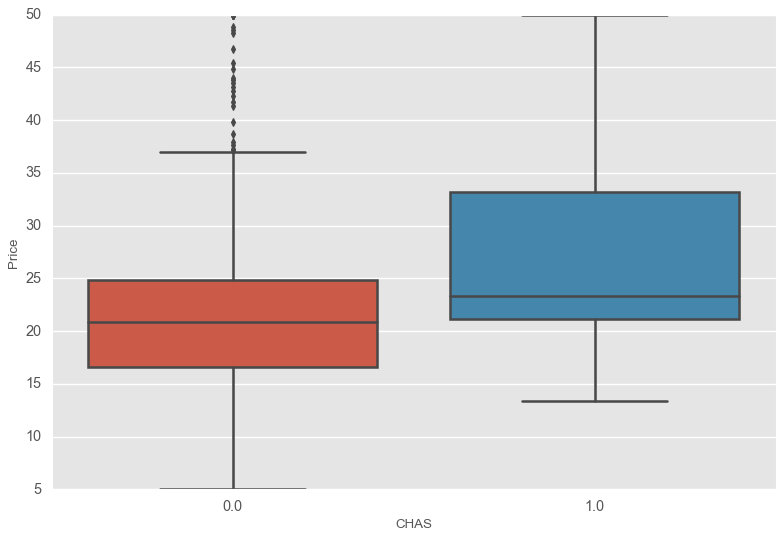

In [73]:
# plot price vs CHAS, the Charles River dummy variable, which is one if the property
# borders the river and zero if the property does not border the river
sns.boxplot(y = 'Price', x = 'CHAS', data = data)

The boxplot shows us that houses near the river (blue) tend to be a little higher in price than houses that aren't (red).  However, there are a number of outliers in the upper left of the graph (the points above the third quartile).  We might also be interested in seeing how variables within a data set relate to each other.  This can be accomplished with relplot(). 

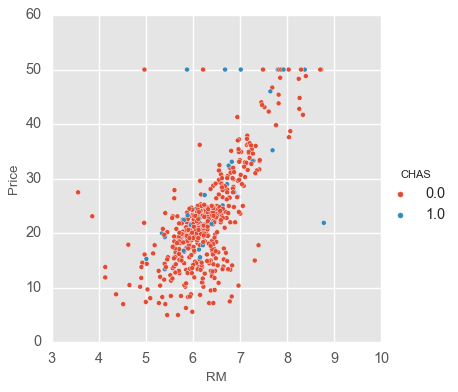

In [76]:
sns.relplot(x ='RM', y = 'Price', data = data, hue = 'CHAS') 
# hue gives different colors depending on if the home is near the river
# this plot lets us look at 3 variables-- rooms, river proximity, price

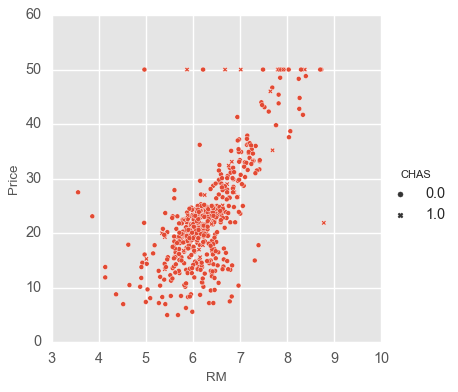

In [77]:
# change style-- rather than colors, we can have different shapes
sns.relplot(x ='RM', y = 'Price', data = data, style = 'CHAS') 

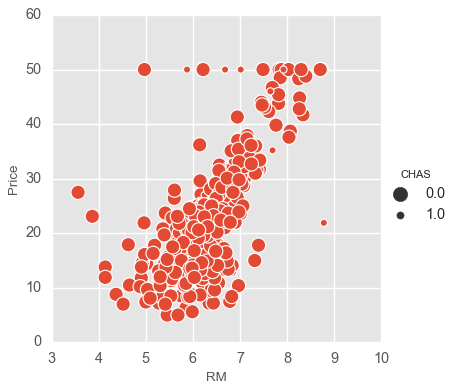

In [78]:
# we can also use size
sns.relplot(x ='RM', y = 'Price', data = data, size = 'CHAS') 

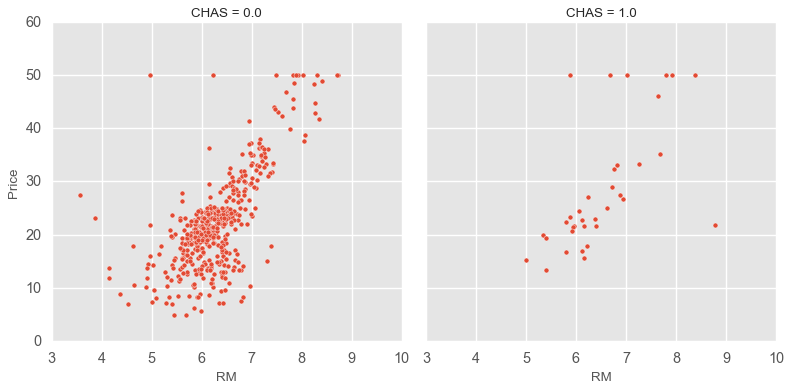

In [79]:
# we can also separate this information into 2 plots based on the river boundary
sns.relplot(x ='RM', y = 'Price', data = data, col = 'CHAS') 

## Joint Plot

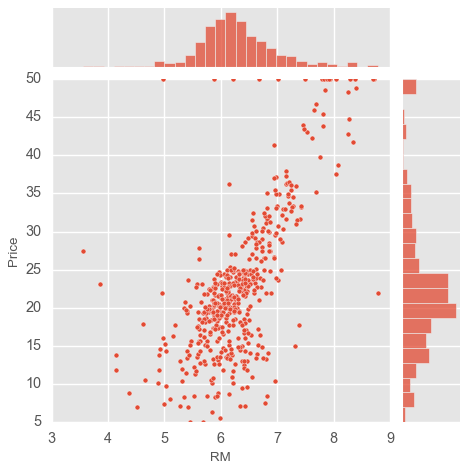

In [80]:
# we might be interested in looking at rooms vs price and seeing the 
# distribution plots in addition to the scatter plot.
sns.jointplot(x = data['RM'], y = data['Price'])

The distributions show us that  the house price variable is concentrated around 20 (in thousands of dollars), and number of rooms is concentrated around 6.  We see this by looking at the distribution on the right edge and noticing that it is grouped around 20, and then looking at the distribution on the top edge and noticing it is grouped around 6.  This can also be clarified by using the 'hex' option in the figure below.  Notice the darker hexagons are clustered around 6 rooms, 20 thousand dollars.


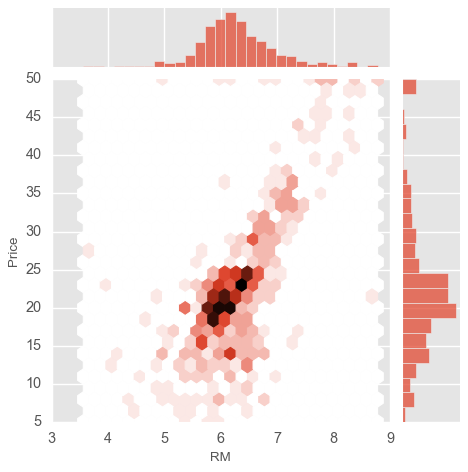

In [82]:
# rather than scatter plot, we can make a hex plot
sns.jointplot(x = data['RM'], y = data['Price'], kind = 'hex')

A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. In other words the aim of KDE is to find the PDF for a given dataset.  Again, notice in this plot that the peak of the two distribution curves occur at 20 (thousands of dollars) and 6 rooms, respectively.

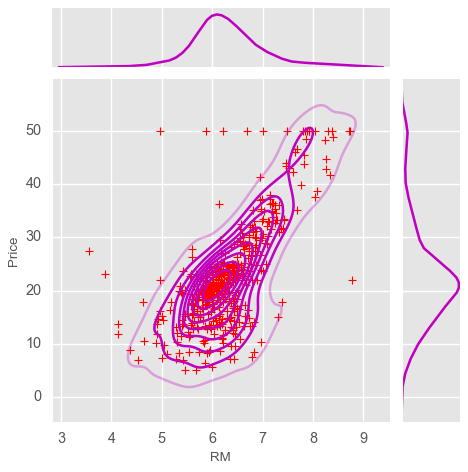

In [88]:
# kde plot with a scatter plot
g = sns.jointplot(x = data['RM'], y = data['Price'], kind = 'kde', color = 'm')
# c is color, s is size, marker can be specificed to be a symbol such as the plus sign
g.plot_joint(plt.scatter, c = 'r', s = 40, linewidth = 1, marker = '+')


### Linear Regression

Linear regression is a statical model, as well as an example of a supervised machine learning algorithm.  We will be finding the line of best fit to the data points-- that is, the line that minimizes the "objective function"-- mean squared error.

In [89]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### We will look at the number of rooms per house and predict price by using a line of best fit.

<AxesSubplot:xlabel='RM', ylabel='Price'>

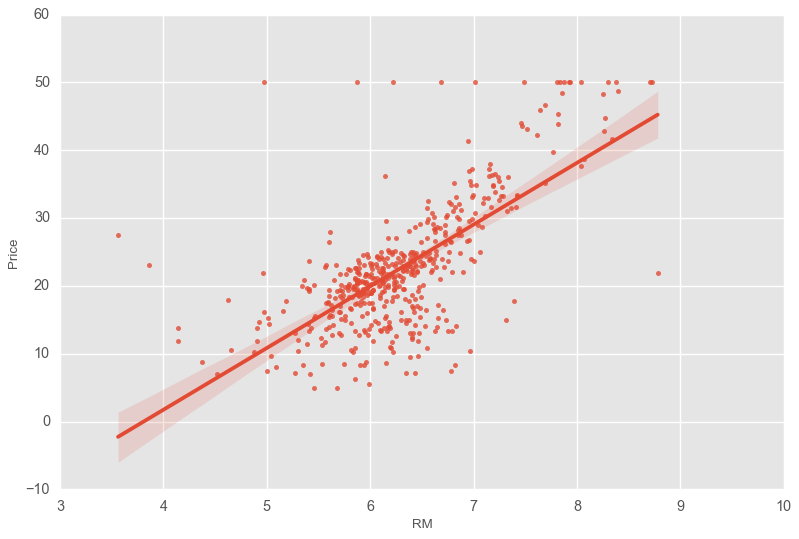

In [90]:
sns.regplot(x = 'RM', y = 'Price', data = data)

The shadow around the line is related to the confidence interval.  A 95% confidence interval is the default (meaning we are 95% sure that the true value falls into this range).  Notice that the shadow is thinner in regions where we have a lot of data points.  It is thicker on the ends, where there are not many points.

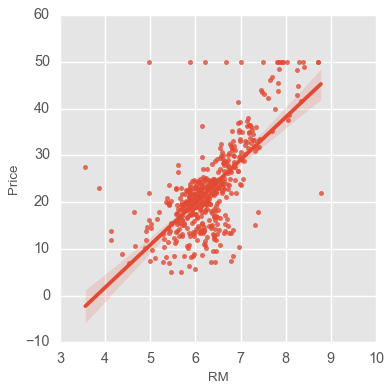

In [91]:
# this makes the figure a bit smaller
sns.lmplot(x = 'RM', y = 'Price', data = data)

In Seaborn, lmplot() and regplot() are similar in terms of the graphs created above.  If you hit shift + double tab for each, you will see the number of options for each and how they vary.  The function regplot() performs a simple linear regression model fit and plot.  The function lmplot() is more computationally intensive.

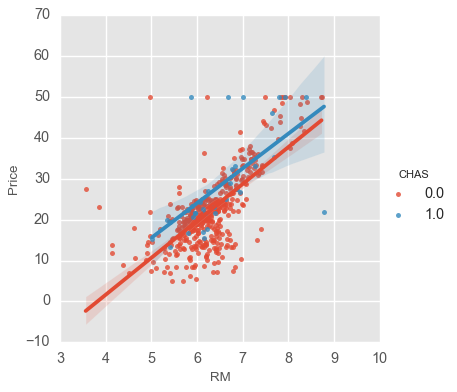

In [92]:
# Let's include CHAS info, too
sns.lmplot(x = 'RM', y = 'Price', data = data, hue = 'CHAS')
# this creates two regression lines

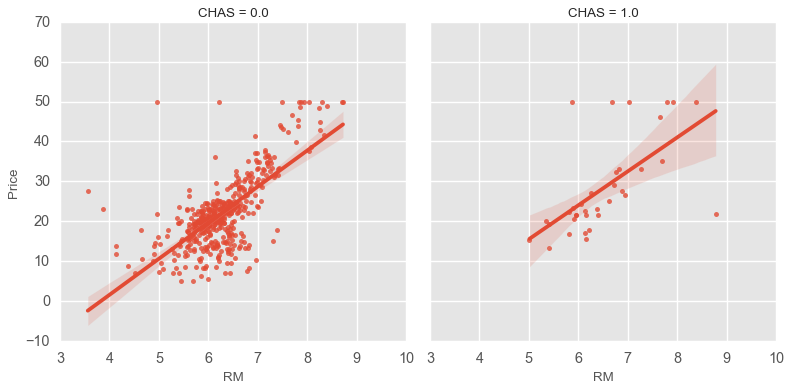

In [93]:
# we can separte this plot out on the CHAS variable
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS')

Not all relationships are linear (order 1).  We can try to fit the data with an order 2 curve (quadratic).

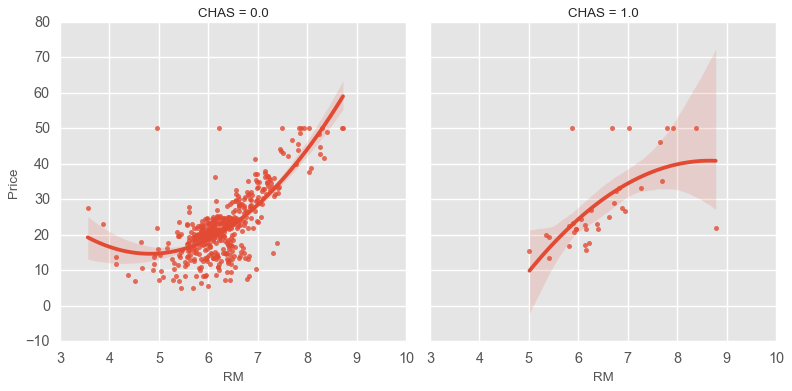

In [94]:
sns.lmplot(x = 'RM', y = 'Price', data = data, col = 'CHAS', order = 2)

In the figure below, notice that the confidence interval widens (the shadow spans a larger price range) as we move from CHAS = 0 to CHAS = 1.  This indicates there is more variability in prices for homes along the river.

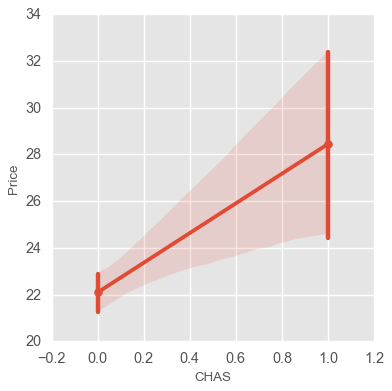

In [95]:
# this graphs shows the variance in house prices at different CHAS levels
sns.lmplot(x = 'CHAS', y = 'Price', data = data, x_estimator = np.mean)

## References
- Aaronson, Daniel, Daniel Hartley, and Bhashkar Mazumder. "The effects of the 1930s HOLC" redlining" maps." American Economic Journal: Economic Policy 13.4 (2021): 355-92.
- Changyong, F. E. N. G., et al. "Log-transformation and its implications for data analysis." Shanghai archives of psychiatry 26.2 (2014): 105.
- Harrison Jr, David, and Daniel L. Rubinfeld. "Hedonic housing prices and the demand for clean air." Journal of environmental economics and management 5.1 (1978): 81-102.


## Further Reading

- Between 1935 and 1940 the federal government’s Home Owners’ Loan Corporation (HOLC) classified the neighborhoods of 239 cities according to their perceived investment risk. This practice has since been referred to as “redlining,” as the neighborhoods classified as being the highest risk for investment were often colored red on the resultant maps. The Mapping Inequality project, a collaboration of faculty at the University of Richmond’s Digital Scholarship Lab, the University of Maryland’s Digital Curation Innovation Center, Virginia Tech, and Johns Hopkins University has digitized and georectified all 239 HOLC maps and made them publicly available, including the HOLC map of Boston from 1938. The Boston Area Research Initiative has coordinated (i.e., spatially joined) the districts from the 1938 HOLC map of Boston with census tracts from the 2010 U.S. Census. This dataset contains the original shapefile and the spatially joined tract-level data. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/WXZ1XK

- Racist housing policies have had and continue to have a profound impact on individuals' well-being.  https://www.npr.org/sections/health-shots/2020/11/19/911909187/in-u-s-cities-the-health-effects-of-past-housing-discrimination-are-plain-to-see


- This is an excellent article by Ta-Nehisis Coates which includes maps of redlining in Chicago: https://www.theatlantic.com/magazine/archive/2014/06/the-case-for-reparations/361631/

- In addition to the features discussed being problematic, this 2017 paper suggests that the feature used as a proxy for air pollution (NOX) suffers from a unit of observation issue.  https://openjournals.wu.ac.at/region/paper_107/107.html
        